In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [2]:
%matplotlib inline
from IPython.core.display import clear_output, display
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from sklearn.preprocessing import MinMaxScaler

Google Drive Mount

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Load Dataset

In [4]:
filename = '/content/drive/MyDrive/training/train_finedust_real_gen_1143.csv'

In [5]:
df_data = pd.read_csv(filename)
df_data

,date,ground_pm,ground_temper,avg_pm,avg_temper,wind,humid,max_height
0,NaN,5.769822,0.691519,1,1.1,0.3,90,39.5
1,NaN,3.918659,0.944229,1,1.1,0.3,90,17.2
2,NaN,-0.913783,0.676092,1,1.1,0.3,90,26.3
3,NaN,0.415542,1.342938,1,1.1,0.3,90,39.8
4,NaN,-1.717684,1.455120,1,1.1,0.3,90,24.4
...,...,...,...,...,...,...,...,...
1138,NaN,26.437096,16.725000,34,16.0,2.5,74,37.5
1139,NaN,24.518182,16.700000,34,16.0,2.5,74,22.5
1140,NaN,21.774078,16.574031,34,16.0,2.5,74,5.0
1141,NaN,17.890490,15.796070,34,16.0,2.5,74,7.5


Training Data

In [6]:
df_train = df_data[["ground_pm", "ground_temper", "avg_pm", "avg_temper", "wind", "humid"]]

In [7]:
df_train

,ground_pm,ground_temper,avg_pm,avg_temper,wind,humid
0,5.769822,0.691519,1,1.1,0.3,90
1,3.918659,0.944229,1,1.1,0.3,90
2,-0.913783,0.676092,1,1.1,0.3,90
3,0.415542,1.342938,1,1.1,0.3,90
4,-1.717684,1.455120,1,1.1,0.3,90
...,...,...,...,...,...,...
1138,26.437096,16.725000,34,16.0,2.5,74
1139,24.518182,16.700000,34,16.0,2.5,74
1140,21.774078,16.574031,34,16.0,2.5,74
1141,17.890490,15.796070,34,16.0,2.5,74


In [8]:
x_scaler = MinMaxScaler()
df_train_scaled = x_scaler.fit_transform(df_train)
print("Min:", np.min(df_train_scaled))
print("Max:", np.max(df_train_scaled))

Min: 0.0
Max: 1.0


In [9]:
df_train_scaled

array([[0.06723786, 0.07802387, 0.        , 0.10196078, 0.07142857,
        0.90322581],
       [0.05248645, 0.08504341, 0.        , 0.10196078, 0.07142857,
        0.90322581],
       [0.01397804, 0.07759534, 0.        , 0.10196078, 0.07142857,
        0.90322581],
       ...,
       [0.19477142, 0.51919244, 0.27731092, 0.68627451, 0.5952381 ,
        0.64516129],
       [0.16382416, 0.497583  , 0.27731092, 0.68627451, 0.5952381 ,
        0.64516129],
       [0.18594072, 0.51360082, 0.30252101, 0.68627451, 0.42857143,
        0.61290323]])

Target Data

In [10]:
df_target = df_data[["max_height"]]

In [11]:
df_target

,max_height
0,39.5
1,17.2
2,26.3
3,39.8
4,24.4
...,...
1138,37.5
1139,22.5
1140,5.0
1141,7.5


In [12]:
y_scaler = MinMaxScaler()
df_target_scaled = y_scaler.fit_transform(df_target)
print("Min:", np.min(df_target_scaled))
print("Max:", np.max(df_target_scaled))

Min: 0.0
Max: 1.0


In [13]:
df_target_scaled

array([[0.98734177],
       [0.42278481],
       [0.65316456],
       ...,
       [0.11392405],
       [0.17721519],
       [0.17721519]])

Shape of train and target dataset

In [14]:
print(df_train_scaled.shape)
print(df_target_scaled.shape)

(1143, 6)
(1143, 1)


Placeholder

In [15]:
X = tf.placeholder(tf.float32, [None, 6], name='train_data')
Y = tf.placeholder(tf.float32, [None, 1], name='target_data')

Define add_layer function
*   Add one more layer and return the output of this layer

In [16]:
def add_layer(inputs, in_size, out_size, activation_function=None):
  Weights = tf.Variable(tf.random_normal([in_size, out_size]), name='w')
  biases = tf.Variable(tf.random_normal([1, out_size]), name='b')
  Wx_plus_b = tf.matmul(inputs, Weights) + biases
  
  if activation_function is None:
    outputs = Wx_plus_b
  else:
    outputs = activation_function(Wx_plus_b)
  
  return outputs

Build a model

In [17]:
help(add_layer)

Help on function add_layer in module __main__:

add_layer(inputs, in_size, out_size, activation_function=None)



In [18]:
num_of_node = 100
# add hidden layer
layer_1 = add_layer(X, 6, 32, activation_function=tf.nn.sigmoid)
layer_2 = add_layer(layer_1, 32, 64, activation_function=tf.nn.sigmoid)
layer_3 = add_layer(layer_2, 64, 128, activation_function=tf.nn.sigmoid)
layer_4 = add_layer(layer_3, 128, 256, activation_function=tf.nn.sigmoid)
layer_5 = add_layer(layer_4, 256, 128, activation_function=tf.nn.sigmoid)
layer_6 = add_layer(layer_5, 128, 64, activation_function=tf.nn.sigmoid)
layer_7 = add_layer(layer_6, 64, 32, activation_function=tf.nn.sigmoid)
layer_8 = add_layer(layer_7, 32, 16, activation_function=tf.nn.sigmoid)
output = add_layer(layer_8, 16, 1, activation_function=tf.nn.sigmoid)

Cost function
*   Mean Squared Error

Optimizer
*   GradientDescentOptimizer

In [19]:
cost = tf.reduce_mean(tf.square(Y - output))
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

In [20]:
date = np.array(range(len(df_train_scaled)))
date

array([   0,    1,    2, ..., 1140, 1141, 1142])

Training the model

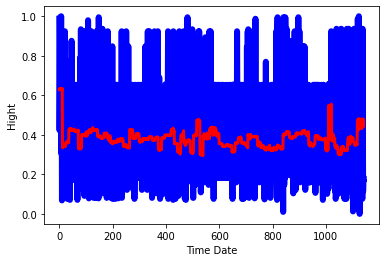

step :  20000  cost :  0.05338832


In [21]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(date, df_target_scaled, 'b-', lw=6)
plt.xlabel("Time Date")
plt.ylabel("Hight")

saver = tf.train.Saver()
with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  
  for step in range(20001):
    cost_val, _ = sess.run([cost, train], feed_dict={X:df_train_scaled, Y:df_target_scaled})
    if step % 100 == 0:
      try:
        lines[0].remove()
      except Exception:
        pass
      
      prediction_value = sess.run(output, feed_dict={X: df_train_scaled})
      lines = ax.plot(date, prediction_value, 'r-', lw=3)

      time.sleep(0.5)
      clear_output()
      display(fig)
      plt.pause(1)

      print('step : ', step, ' cost : ', cost_val)

  saver.save(sess, "checkpoint/Fine_Dust_Rewrite.ckpt")  

plt.close()

Testing the model

In [22]:
filename = '/content/drive/MyDrive/testing/test_finedust_real_gen_124.csv'

In [23]:
df_test = pd.read_csv(filename)
df_test

,date,ground_pm,ground_temper,avg_pm,avg_temper,wind,humid,max_height
0,NaN,58.578611,-1.189554,59,-1.1,3.5,43,23.8
1,NaN,58.761213,-0.956766,59,-1.1,3.5,43,7.7
2,NaN,61.310958,-0.932109,59,-1.1,3.5,43,12.7
3,NaN,55.741208,-0.881863,59,-1.1,3.5,43,12.5
4,NaN,57.326914,-1.415620,59,-1.1,3.5,43,26.3
...,...,...,...,...,...,...,...,...
119,NaN,29.975892,24.040321,25,23.0,1.6,53,7.0
120,NaN,25.111696,24.144541,25,23.0,1.6,53,7.5
121,NaN,30.782762,23.227887,25,23.0,1.6,53,31.5
122,NaN,30.665762,23.007920,25,23.0,1.6,53,17.0


In [24]:
df_test_input = df_data[["ground_pm", "ground_temper", "avg_pm", "avg_temper", "wind", "humid"]]
df_test_target = df_data[["max_height"]]

In [25]:
x_test_scaler = MinMaxScaler()
df_test_input_scaled = x_test_scaler.fit_transform(df_test_input)

y_test_scaler = MinMaxScaler()
df_test_target_scaled = y_test_scaler.fit_transform(df_test_target)

In [26]:
df_test_target_scaled

array([[0.98734177],
       [0.42278481],
       [0.65316456],
       ...,
       [0.11392405],
       [0.17721519],
       [0.17721519]])

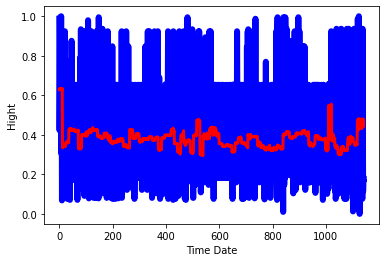

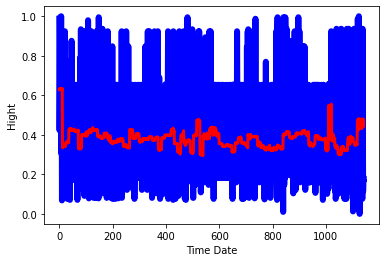

Cost: 0.053388238


In [27]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(date, df_target_scaled, 'b-', lw=6)
plt.xlabel("Time Date")
plt.ylabel("Hight")

saver = tf.train.Saver()
with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  saver.restore(sess, "checkpoint/Fine_Dust_Rewrite.ckpt")

  prediction_value = sess.run(output, feed_dict={X: df_test_input_scaled})
  lines = ax.plot(date, prediction_value, 'r-', lw=3)

  time.sleep(0.5)
  clear_output()
  display(fig)
  plt.pause(1)


  print("Cost:", cost.eval({X: df_test_input_scaled, Y: df_test_target_scaled}))